In [7]:
# Neural Network Code by Shuba
# modified by Abdul

In [2]:
#Importing Libraries

import torch
import pandas as pd
from torch.autograd import Variable
#import torch.nn.functional as F
import torch.utils.data as Data
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
import numpy as np
#import imageio
# the file is saved in the local drive
# used data file from the local drive
import os 

In [32]:
# Load and Process Data

cwd = os.getcwd()
temp_demand_data = pd.read_csv('../../report/Cleaned_Data.csv') 

# creating tensor from targets_df 
y = torch.tensor([temp_demand_data['TOTALDEMAND'].values])

from datetime import datetime

temp_demand_data['Date_object'] = temp_demand_data['Date'].apply(pd.to_datetime, format='%d/%m/%Y')

temp_demand_data['month'] = temp_demand_data['Date_object'].apply(lambda x: x.month)

temp_demand_data['day'] = temp_demand_data['Date_object'].apply(lambda x: x.day)

times = list(temp_demand_data['Time'][:48])

temp_demand_data['time_int'] = temp_demand_data['Time'].apply(lambda x: times.index(x))

X = temp_demand_data[['TEMPERATURE', 'day', 'month', 'time_int']]

x = torch.tensor(X.values)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

In [18]:
x

tensor([[23.1000,  1.0000,  1.0000,  0.0000],
        [22.9000,  1.0000,  1.0000,  1.0000],
        [22.6000,  1.0000,  1.0000,  2.0000],
        ...,
        [19.5000, 17.0000,  3.0000, 45.0000],
        [19.1000, 17.0000,  3.0000, 46.0000],
        [18.8000, 17.0000,  3.0000, 47.0000]], dtype=torch.float64)

In [33]:
# Printing the Value in x which has Temperature 
print(x)

tensor([[23.1000,  1.0000,  1.0000,  0.0000],
        [22.9000,  1.0000,  1.0000,  1.0000],
        [22.6000,  1.0000,  1.0000,  2.0000],
        ...,
        [19.5000, 17.0000,  3.0000, 45.0000],
        [19.1000, 17.0000,  3.0000, 46.0000],
        [18.8000, 17.0000,  3.0000, 47.0000]], dtype=torch.float64)


In [34]:
# Printing the Value in y which has Temperature 
print(y)

tensor([[8038.0000, 7809.3100, 7483.6900,  ..., 7417.9100, 7287.3200,
         7172.3900]], dtype=torch.float64)


In [21]:
temp_demand_data.head()

,TOTALDEMAND,Date,Time,TEMPERATURE,Date_object,month,day,time_int
0,8038.00,1/1/2010,0:00,23.1,2010-01-01,1,1,0
1,7809.31,1/1/2010,0:30,22.9,2010-01-01,1,1,1
2,7483.69,1/1/2010,1:00,22.6,2010-01-01,1,1,2
3,7117.23,1/1/2010,1:30,22.5,2010-01-01,1,1,3
4,6812.03,1/1/2010,2:00,22.5,2010-01-01,1,1,4


In [22]:
# Analyse the Temparature and Demand Data
temp_demand_data.describe().T

,count,mean,std,min,25%,50%,75%,max
TOTALDEMAND,196512.0,8113.151043,1299.534049,5074.63,7150.1075,8053.23,8958.55,14579.86
TEMPERATURE,196512.0,17.527668,5.881951,-1.30,13.5000,17.90,21.50,44.70
month,196512.0,6.435271,3.476792,1.00,3.0000,6.00,9.00,12.00
day,196512.0,15.696141,8.795450,1.00,8.0000,16.00,23.00,31.00
time_int,196512.0,23.500000,13.853434,0.00,11.7500,23.50,35.25,47.00


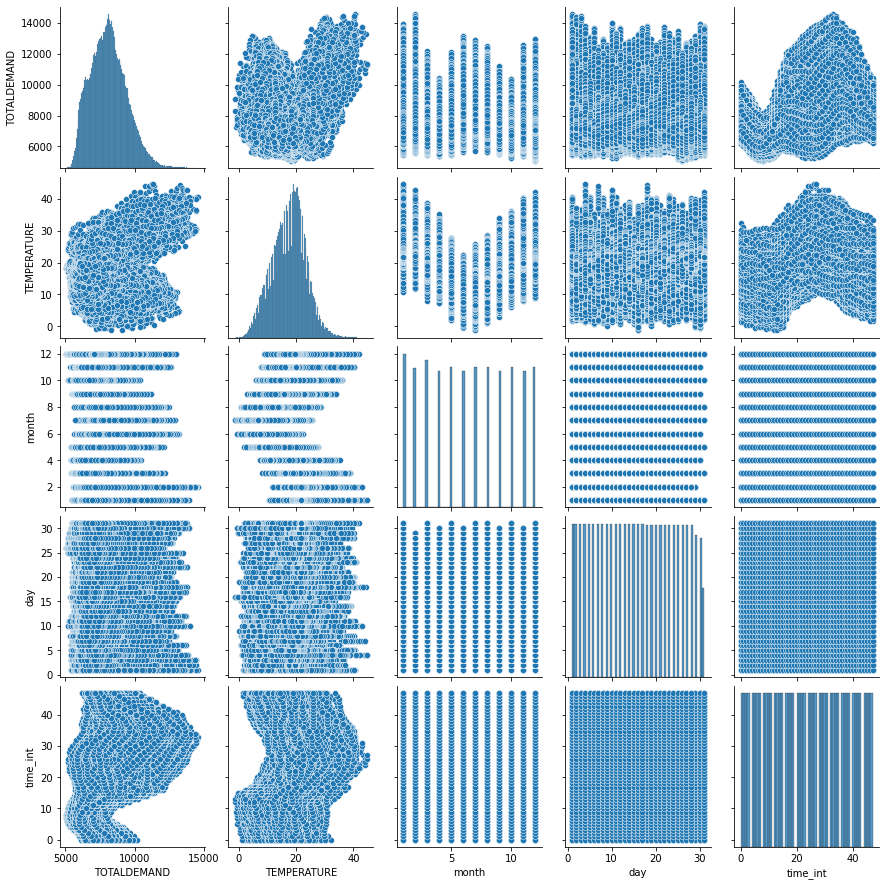

In [23]:
#Plot Temparature and Demand Data in Graph
sns.pairplot(temp_demand_data)
plt.show()

In [41]:
#x = x.reshape((x.shape[1], 1))
y = y.reshape((y.shape[1], 1))

In [35]:
# Check Size of Input
x.size()



torch.Size([196512, 4])

In [42]:
# At present the current Layers and Activation has been used
y.size()

torch.Size([196512, 1])

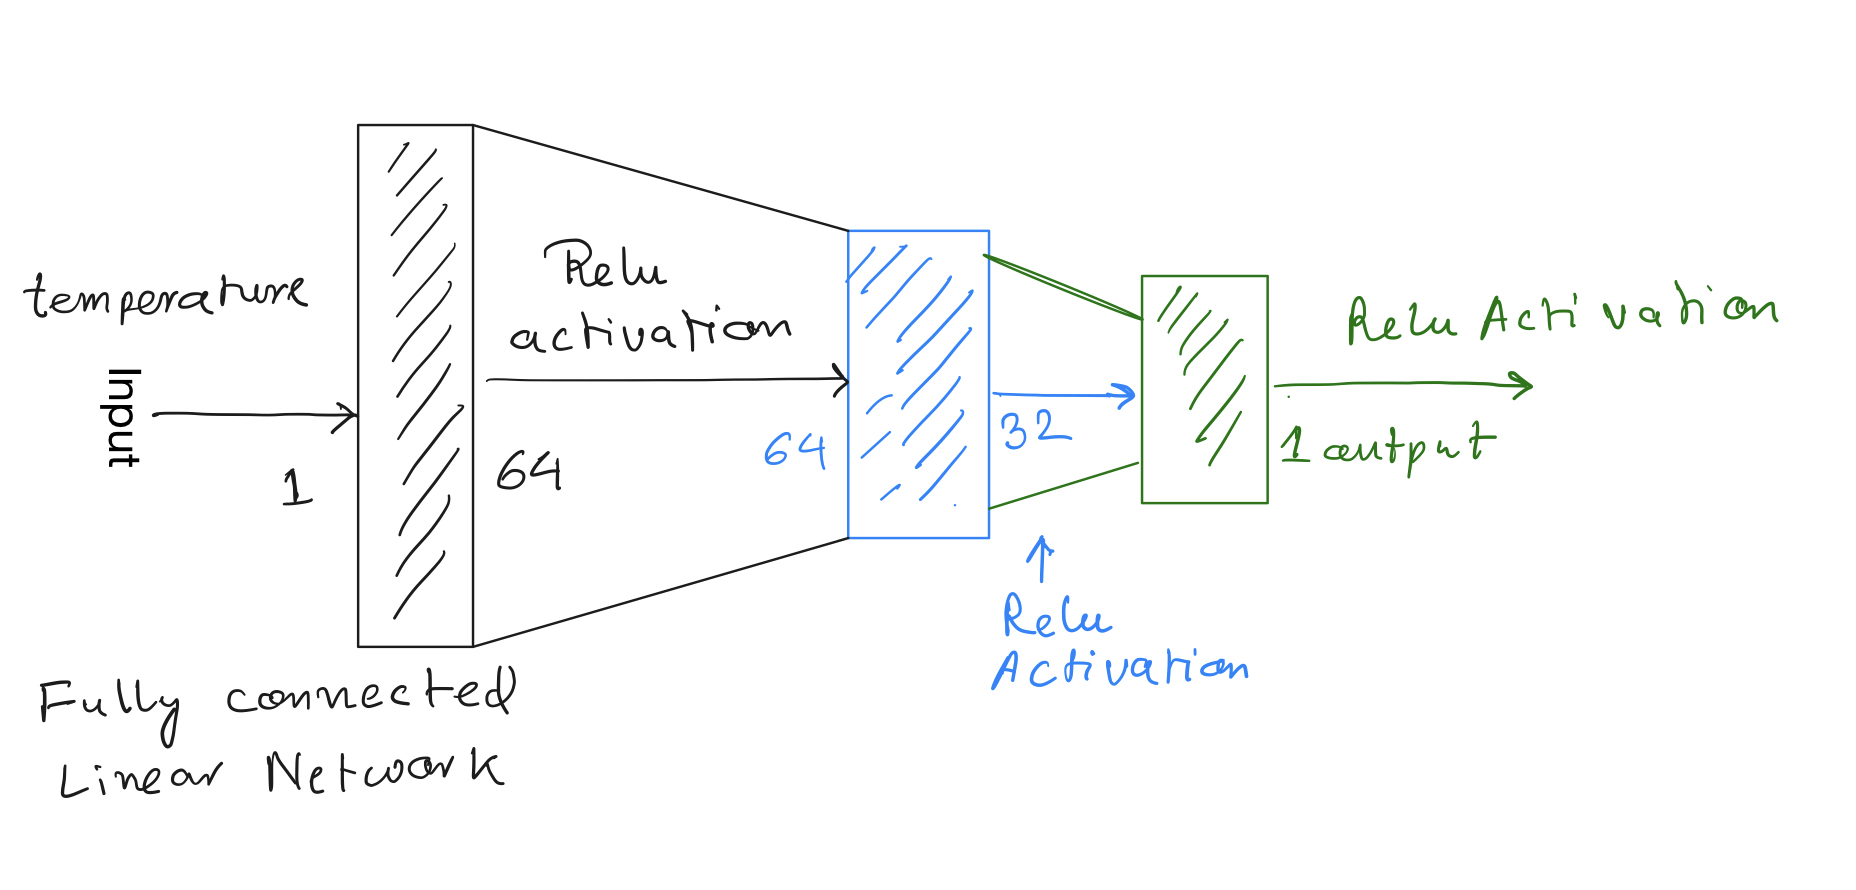



In [43]:
class MLP(torch.nn.Module):
    # Multilayer Perceptron for regression.
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(4, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 1)
        )
        
    def forward(self, x):
        #Forward pass
#         x = x.view(1, -1)
        return self.layers(x)

# The Neural Network should have a dense layer as shown below.
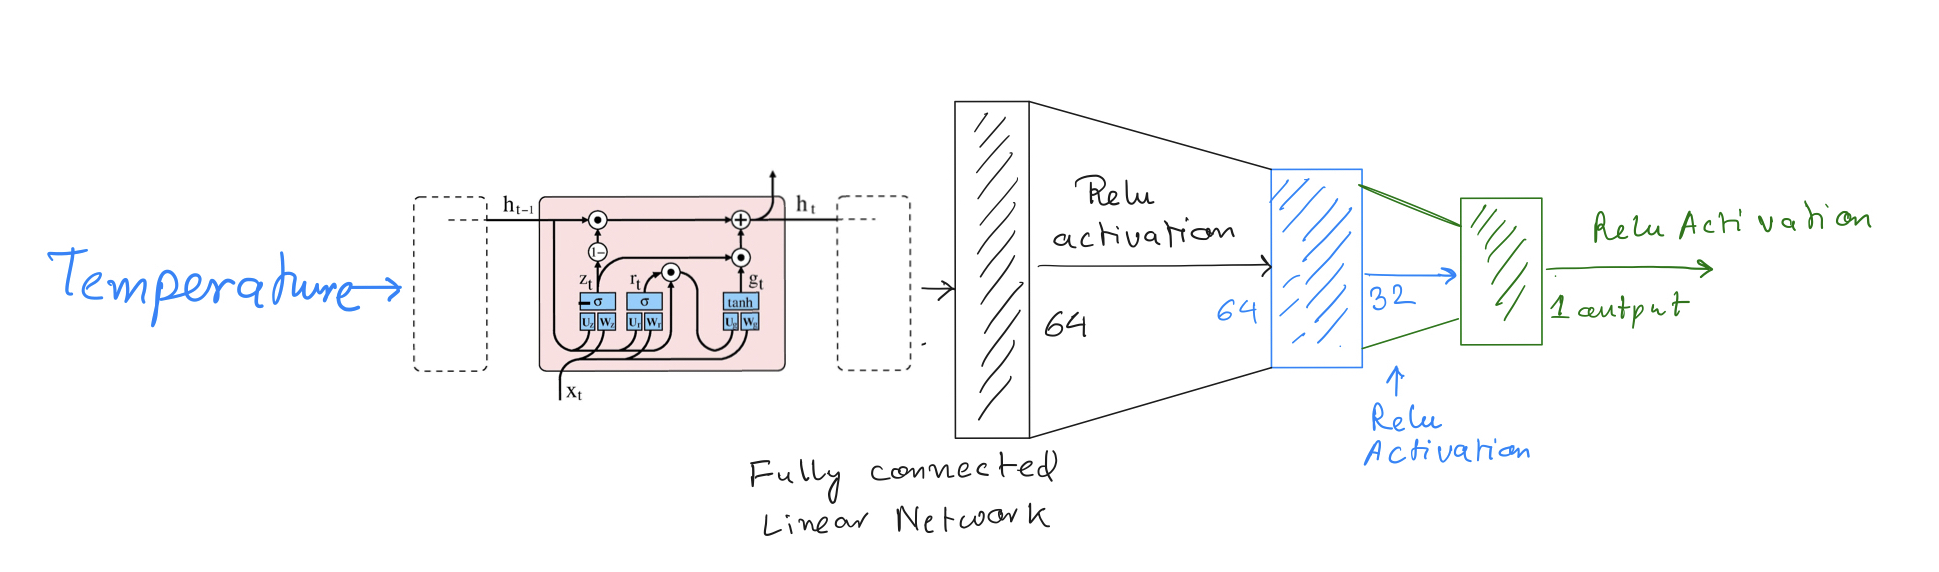

In [44]:
# Apply Scaling of the Data 

if not torch.is_tensor(x) and not torch.is_tensor(y):
    # Apply scaling if necessary
    if scale_data:
        x = StandardScaler().fit_transform(x)
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)

In [40]:
# Setting a fixed random seed.

torch.manual_seed(42)

# Prepare the Dataset
processed_dataset = Data.TensorDataset(x, y)

#Setting the Batch Size
BATCH_SIZE = 1000
    
loader = Data.DataLoader(
    dataset= processed_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=1)

AssertionError: Size mismatch between tensors

In [14]:
# Initialize the MLP
mlp = MLP()

# Define the loss function and optimizer
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)


In [15]:
# Run the training loop
for epoch in range(0, 10): # 10 epochs at maximum
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(loader, 0):
        # Get and prepare inputs
        inputs, targets = data

        inputs, targets = inputs.float(), targets.float()
        
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = mlp(inputs)
        
        # Compute loss
        loss = loss_function(outputs, targets)
        
        # Perform backward pass
        loss.backward()
        
        
        # Perform optimization
        optimizer.step()
        
        # Print statistics
        current_loss += loss.item()
        if i % 10 == 0:
            print('Loss after mini-batch %5d: %.3f' %
                  (i + 1, current_loss / 500))
            current_loss = 0.0
            
            
        

Starting epoch 1
Loss after mini-batch     1: 16.343
Loss after mini-batch    11: 162.103
Loss after mini-batch    21: 162.002
Loss after mini-batch    31: 162.349
Loss after mini-batch    41: 162.307
Loss after mini-batch    51: 162.085
Loss after mini-batch    61: 162.885
Loss after mini-batch    71: 162.520
Loss after mini-batch    81: 161.936
Loss after mini-batch    91: 162.409
Loss after mini-batch   101: 162.066
Loss after mini-batch   111: 162.753
Loss after mini-batch   121: 162.167
Loss after mini-batch   131: 162.662
Loss after mini-batch   141: 161.980
Loss after mini-batch   151: 162.179
Loss after mini-batch   161: 161.942
Loss after mini-batch   171: 161.744
Loss after mini-batch   181: 162.155
Loss after mini-batch   191: 162.611
Starting epoch 2
Loss after mini-batch     1: 16.425
Loss after mini-batch    11: 162.429
Loss after mini-batch    21: 161.950
Loss after mini-batch    31: 161.924
Loss after mini-batch    41: 162.089
Loss after mini-batch    51: 162.166
Loss a